In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
#Simple Exponetial Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#US_Cases_Deaths_Counties = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
#US_Cases_Deaths_Counties.set_index("date",inplace=True)
#US_Cases_Deaths_Counties.index = pd.DatetimeIndex(US_Cases_Deaths_Counties.index).to_period('D')

US_Cases_Deaths = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv',index_col='date',parse_dates=True)
US_Cases_Deaths.index.freq = 'D'
US_Cases_Deaths.tail()

,cases,deaths
date,,
2020-05-11,1354349,80682
2020-05-12,1376641,82337
2020-05-13,1397783,84105
2020-05-14,1424739,85843
2020-05-15,1450970,87436


In [3]:
US_Cases_Deaths_States = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv',index_col='date',parse_dates=True)
US_Cases_Deaths_States.index = pd.DatetimeIndex(US_Cases_Deaths_States.index).to_period('D')
US_Cases_Deaths_States.tail()

,state,fips,cases,deaths
date,,,,
2020-05-15,Virginia,51,28672,977
2020-05-15,Washington,53,19230,1008
2020-05-15,West Virginia,54,1447,64
2020-05-15,Wisconsin,55,11854,445
2020-05-15,Wyoming,56,716,7


In [4]:
US_Cases_Deaths.describe()

,cases,deaths
count,1.160000e+02,116.000000
mean,3.444601e+05,18561.017241
std,4.758369e+05,28019.100280
min,1.000000e+00,0.000000
25%,2.500000e+01,0.000000
50%,1.037150e+04,187.000000
75%,6.800342e+05,34854.500000
max,1.450970e+06,87436.000000


In [5]:
US_Cases_Deaths_States.describe()

,fips,cases,deaths
count,4084.000000,4084.000000,4084.000000
mean,31.493389,9783.880509,527.198335
std,18.412217,31114.271848,2226.408788
min,1.000000,1.000000,0.000000
25%,17.000000,68.000000,1.000000
50%,31.000000,1118.000000,25.000000
75%,46.000000,6485.250000,224.250000
max,78.000000,350951.000000,27755.000000


In [0]:
US_Cases_Deaths_States.drop('fips',inplace=True,axis=1)

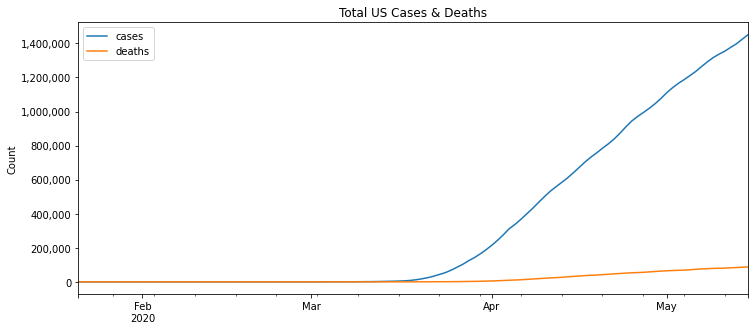

In [7]:
# HERE'S A TRICK TO ADD COMMAS TO Y-AXIS TICK VALUES
formatter = ticker.StrMethodFormatter('{x:,.0f}')

title = 'Total US Cases & Deaths'
ylabel='Count'
xlabel='' # we don't really need a label here

ax = US_Cases_Deaths.plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

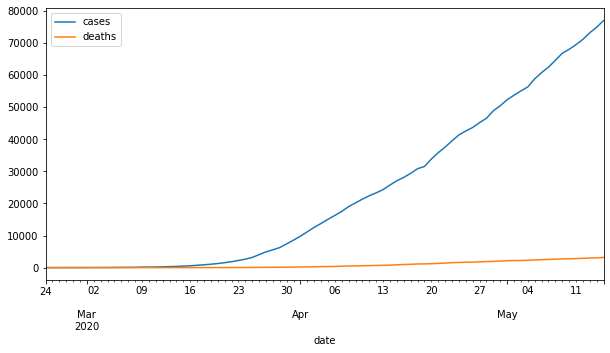

In [8]:
CA_df = US_Cases_Deaths_States[US_Cases_Deaths_States["state"] == "California"]

CA_df = CA_df[CA_df["cases"] > 10]
CA_df = CA_df[["cases", "deaths"]]
CA_df.plot(figsize=(10,5))

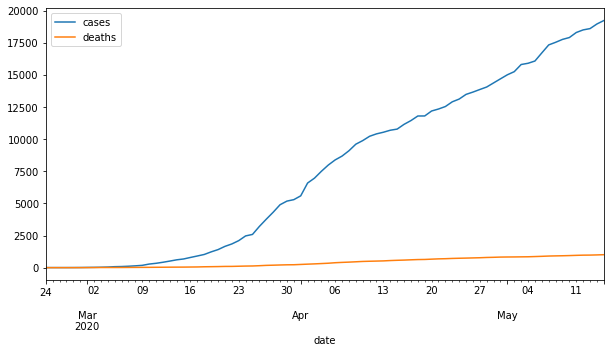

In [9]:
WA_df = US_Cases_Deaths_States[US_Cases_Deaths_States["state"] == "Washington"]

WA_df = WA_df[WA_df["cases"] > 1]
WA_df = WA_df[["cases", "deaths"]]
WA_df.plot(figsize=(10,5))

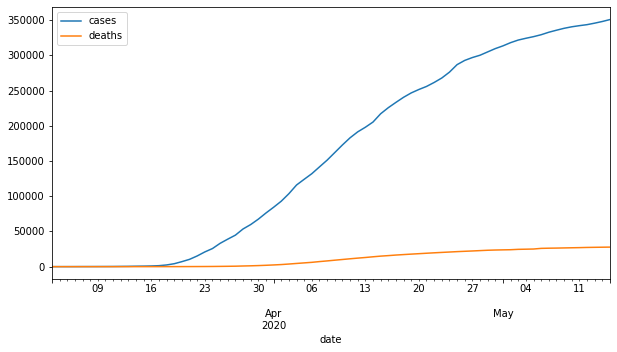

In [10]:
NY_df = US_Cases_Deaths_States[US_Cases_Deaths_States["state"] == "New York"]

NY_df = NY_df[NY_df["cases"] > 1]
NY_df = NY_df[["cases", "deaths"]]
NY_df.plot(figsize=(10,5))

In [11]:
WA_df = WA_df.drop(["deaths"], axis=1)
WA_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 82 entries, 2020-02-24 to 2020-05-15
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cases   82 non-null     int64
dtypes: int64(1)
memory usage: 1.3 KB


In [0]:
WA_training_count = round(len(WA_df) * .75)
WA_training_data = WA_df.iloc[:WA_training_count + 1]
WA_test_data = WA_df.iloc[WA_training_count:]

In [0]:
WA_multiplicative_model = ExponentialSmoothing(WA_training_data['cases'],trend='mul').fit()
WA_additive_model = ExponentialSmoothing(WA_training_data['cases'],trend='add').fit()

In [0]:
WA_test_predictions_mul = WA_multiplicative_model.forecast(len(WA_test_data)).rename('HW Forecast')
WA_test_predictions_add = WA_additive_model.forecast(len(WA_test_data)).rename('HW Forecast')

In [15]:
WA_test_predictions_mul

2020-04-27    13928.858949
2020-04-28    14194.157656
2020-04-29    14464.509427
2020-04-30    14740.010504
2020-05-01    15020.758966
2020-05-02    15306.854759
2020-05-03    15598.399729
2020-05-04    15895.497668
2020-05-05    16198.254340
2020-05-06    16506.777526
2020-05-07    16821.177058
2020-05-08    17141.564861
2020-05-09    17468.054993
2020-05-10    17800.763683
2020-05-11    18139.809373
2020-05-12    18485.312762
2020-05-13    18837.396848
2020-05-14    19196.186972
2020-05-15    19561.810862
2020-05-16    19934.398677
Freq: D, Name: HW Forecast, dtype: float64

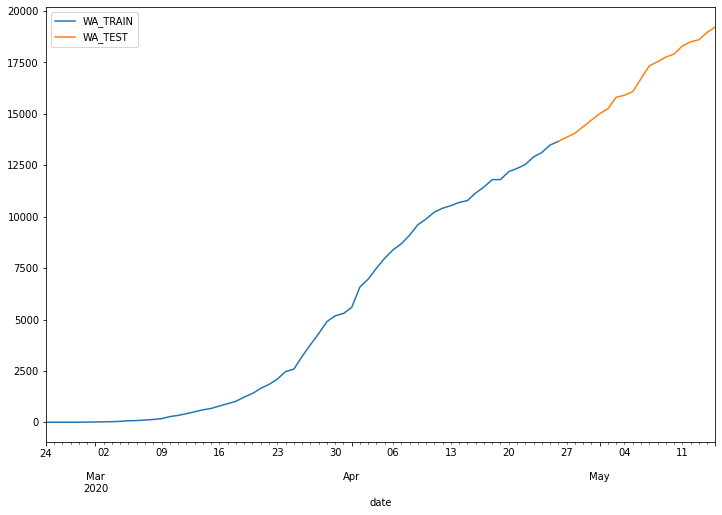

In [16]:
WA_training_data['cases'].plot(legend=True,label='WA_TRAIN')
WA_test_data['cases'].plot(legend=True,label='WA_TEST',figsize=(12,8));

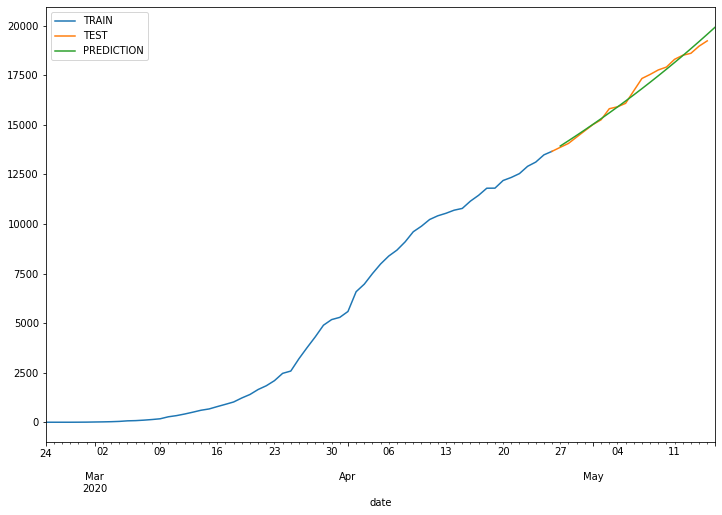

In [17]:
WA_training_data['cases'].plot(legend=True,label='TRAIN')
WA_test_data['cases'].plot(legend=True,label='TEST',figsize=(12,8));
WA_test_predictions_mul.plot(legend=True,label='PREDICTION');

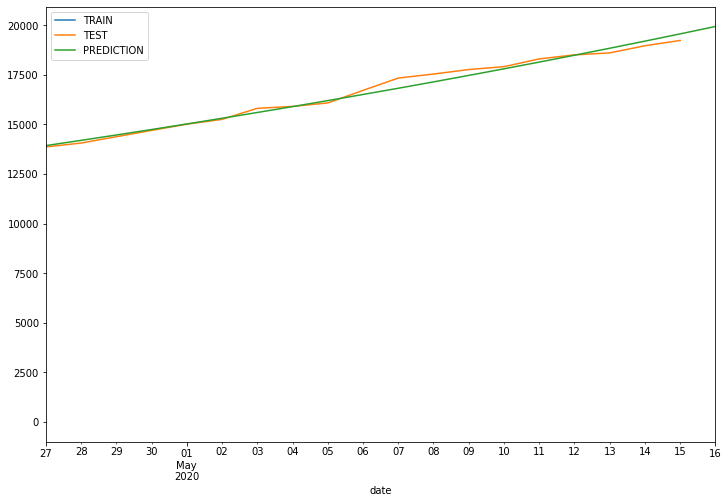

In [18]:
WA_training_data['cases'].plot(legend=True,label='TRAIN')
WA_test_data['cases'].plot(legend=True,label='TEST',figsize=(12,8))
#let's zoom into the period we were predicting for
WA_test_predictions_mul.plot(legend=True,label='PREDICTION',xlim=[WA_test_predictions_mul.iloc[:].index[0].strftime('%Y-%m-%d'),WA_test_predictions_mul.iloc[-1:].index[0].strftime('%Y-%m-%d')]);

In [19]:
#MAE of the multiplicative model
mean_absolute_error(WA_test_data['cases'],WA_test_predictions_mul)

309.41579523090223

In [20]:
#MSE of the multiplicative model
mean_squared_error(WA_test_data['cases'],WA_test_predictions_mul)

126071.0980850894

In [21]:
#RMSE of the multiplicative model
np.sqrt(mean_squared_error(WA_test_data['cases'],WA_test_predictions_mul))

355.06492094416956

In [22]:
WA_test_data.describe() #we want to compare MSE with Avergae of Test Data, or RMSE with STD of overall True Data

,cases
count,20.000000
mean,16478.750000
std,1836.555067
min,13663.000000
25%,14931.500000
50%,16397.000000
75%,18006.750000
max,19230.000000


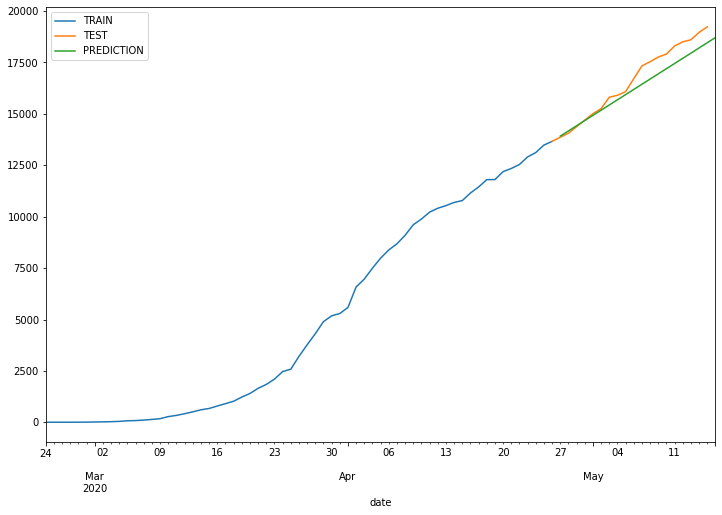

In [23]:
WA_training_data['cases'].plot(legend=True,label='TRAIN')
WA_test_data['cases'].plot(legend=True,label='TEST',figsize=(12,8));
WA_test_predictions_add.plot(legend=True,label='PREDICTION');

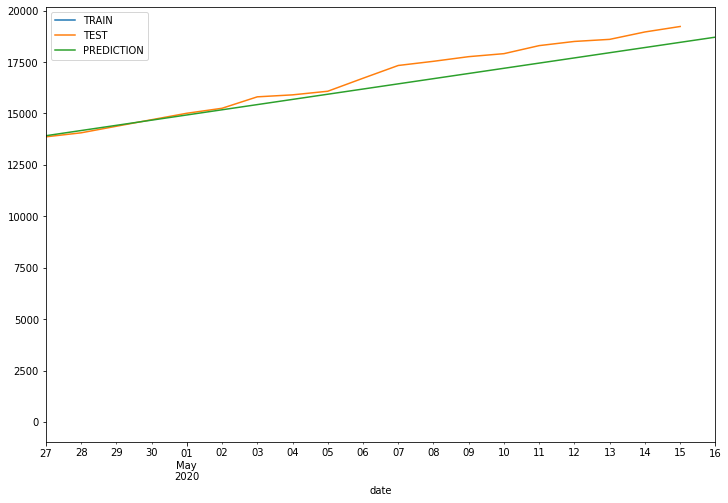

In [24]:
WA_training_data['cases'].plot(legend=True,label='TRAIN')
WA_test_data['cases'].plot(legend=True,label='TEST',figsize=(12,8))
#let's zoom into the period we were predicting for
WA_test_predictions_add.plot(legend=True,label='PREDICTION',xlim=[WA_test_predictions_add.iloc[:].index[0].strftime('%Y-%m-%d'),WA_test_predictions_add.iloc[-1:].index[0].strftime('%Y-%m-%d')]);

In [25]:
#MAE of the multiplicative model
mean_absolute_error(WA_test_data['cases'],WA_test_predictions_add)

358.0027305320503

In [26]:
#MSE of the multiplicative model
mean_squared_error(WA_test_data['cases'],WA_test_predictions_add)

161304.57587410876

In [27]:
#RMSE of the multiplicative model
np.sqrt(mean_squared_error(WA_test_data['cases'],WA_test_predictions_add))

401.62740926648513

In [28]:
WA_test_data.describe() #we want to compare MSE with Avergae of Test Data, or RMSE with STD of overall True Data

,cases
count,20.000000
mean,16478.750000
std,1836.555067
min,13663.000000
25%,14931.500000
50%,16397.000000
75%,18006.750000
max,19230.000000


In [0]:
WA_final_model = ExponentialSmoothing(WA_df['cases'],trend='add').fit()

In [0]:
WA_forecast_predictions = WA_final_model.forecast(14)#forecast two weeks ahead

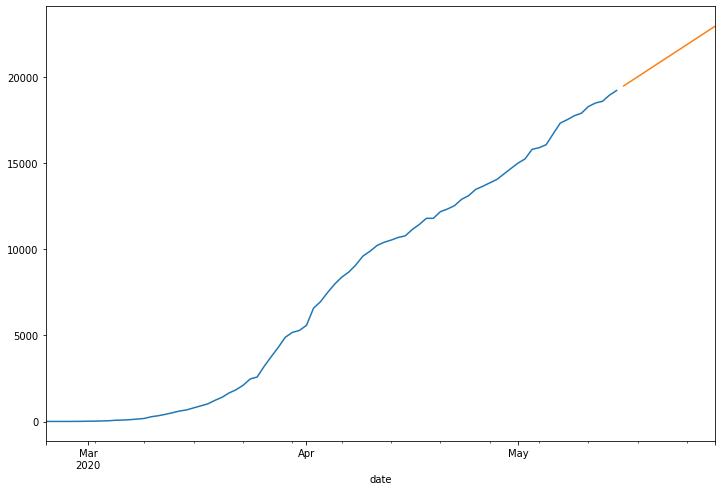

In [31]:
WA_df['cases'].plot(figsize=(12,8))
WA_forecast_predictions.plot();

In [0]:
CA_training_count = round(len(CA_df) * .75)
CA_training_data = CA_df.iloc[:CA_training_count + 1]
CA_test_data = CA_df.iloc[CA_training_count:]

In [0]:
CA_multiplicative_model = ExponentialSmoothing(CA_training_data['cases'],trend='mul').fit()
CA_additive_model = ExponentialSmoothing(CA_training_data['cases'],trend='add',seasonal='add').fit()

In [0]:
CA_test_predictions_mul = CA_multiplicative_model.forecast(len(CA_test_data)).rename('HW Forecast')
CA_test_predictions_add = CA_additive_model.forecast(len(CA_test_data)).rename('HW Forecast')

In [35]:
CA_test_predictions_mul

2020-04-27    44941.054853
2020-04-28    46198.984426
2020-04-29    47492.124272
2020-04-30    48821.459949
2020-05-01    50188.004603
2020-05-02    51592.799737
2020-05-03    53036.916008
2020-05-04    54521.454039
2020-05-05    56047.545263
2020-05-06    57616.352780
2020-05-07    59229.072247
2020-05-08    60886.932789
2020-05-09    62591.197934
2020-05-10    64343.166577
2020-05-11    66144.173970
2020-05-12    67995.592740
2020-05-13    69898.833935
2020-05-14    71855.348097
2020-05-15    73866.626374
2020-05-16    75934.201647
Freq: D, Name: HW Forecast, dtype: float64

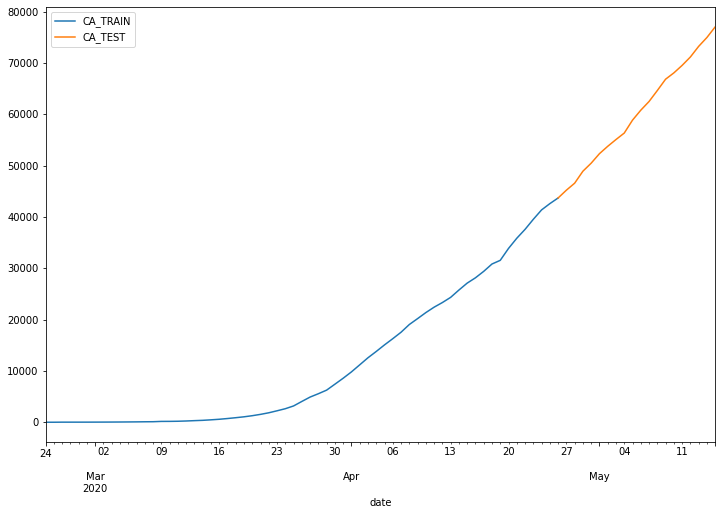

In [36]:
CA_training_data['cases'].plot(legend=True,label='CA_TRAIN')
CA_test_data['cases'].plot(legend=True,label='CA_TEST',figsize=(12,8));

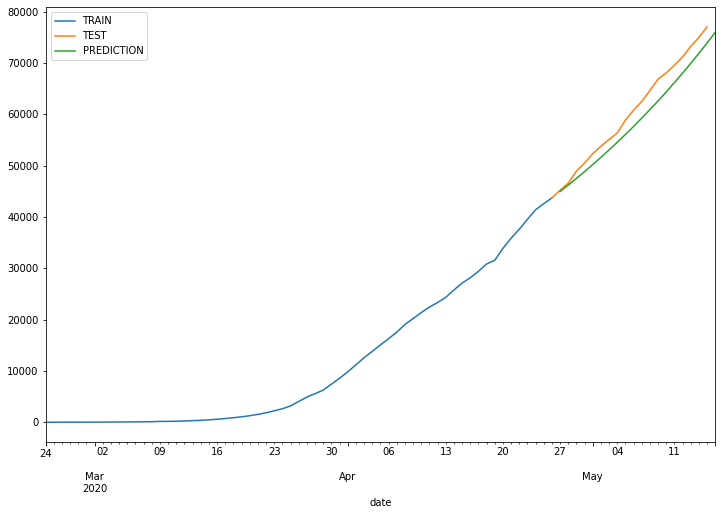

In [37]:
CA_training_data['cases'].plot(legend=True,label='TRAIN')
CA_test_data['cases'].plot(legend=True,label='TEST',figsize=(12,8));
CA_test_predictions_mul.plot(legend=True,label='PREDICTION');

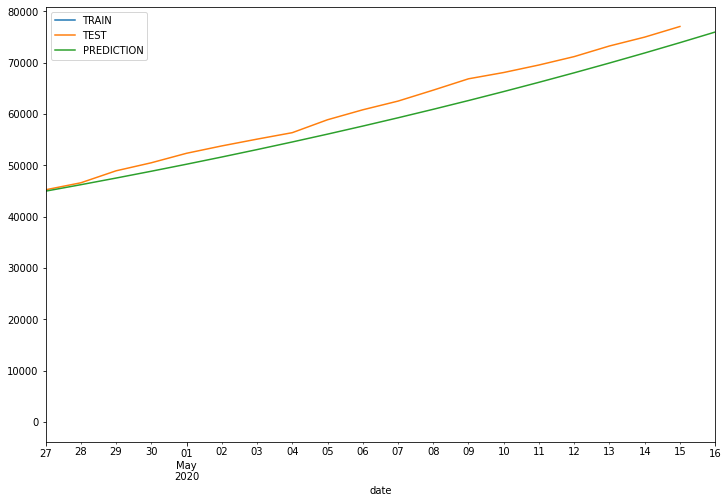

In [38]:
CA_training_data['cases'].plot(legend=True,label='TRAIN')
CA_test_data['cases'].plot(legend=True,label='TEST',figsize=(12,8))
#let's zoom into the period we were predicting for
CA_test_predictions_mul.plot(legend=True,label='PREDICTION',xlim=[CA_test_predictions_mul.iloc[:].index[0].strftime('%Y-%m-%d'),CA_test_predictions_mul.iloc[-1:].index[0].strftime('%Y-%m-%d')]);

In [39]:
#MAE of the multiplicative model
mean_absolute_error(CA_test_data['cases'],CA_test_predictions_mul)

1144.724243115028

In [40]:
#MSE of the multiplicative model
mean_squared_error(CA_test_data['cases'],CA_test_predictions_mul)

1667161.4342513885

In [41]:
#RMSE of the multiplicative model
np.sqrt(mean_squared_error(CA_test_data['cases'],CA_test_predictions_mul))

1291.186057178201

In [42]:
CA_test_data.describe() #we want to compare MSE with Avergae of Test Data, or RMSE with STD of overall True Data

,cases,deaths
count,20.000000,20.000000
mean,59988.500000,2442.650000
std,10407.824594,440.513131
min,43691.000000,1716.000000
25%,51856.000000,2124.500000
50%,59817.500000,2432.000000
75%,68416.750000,2781.750000
max,77015.000000,3192.000000


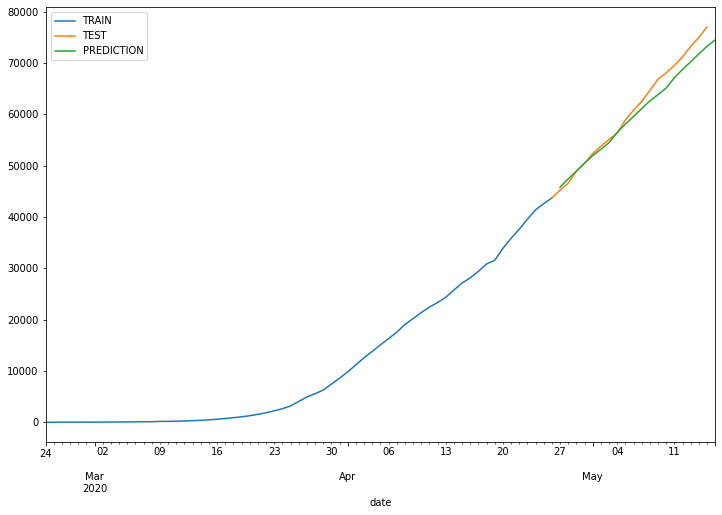

In [43]:
CA_training_data['cases'].plot(legend=True,label='TRAIN')
CA_test_data['cases'].plot(legend=True,label='TEST',figsize=(12,8));
CA_test_predictions_add.plot(legend=True,label='PREDICTION');

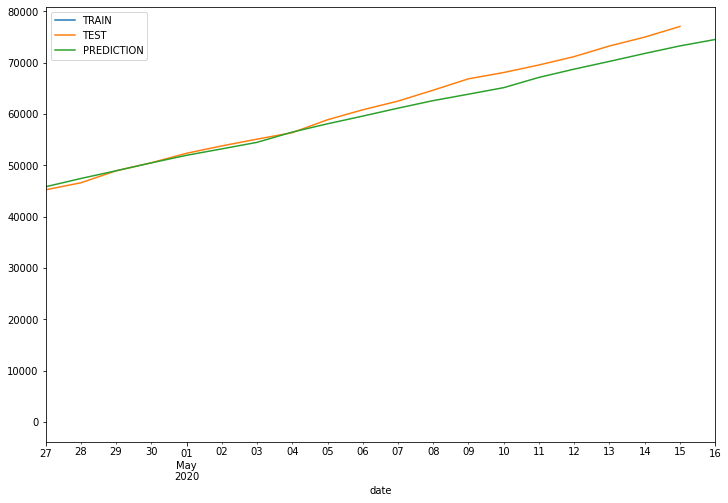

In [44]:
CA_training_data['cases'].plot(legend=True,label='TRAIN')
CA_test_data['cases'].plot(legend=True,label='TEST',figsize=(12,8))
#let's zoom into the period we were predicting for
CA_test_predictions_add.plot(legend=True,label='PREDICTION',xlim=[CA_test_predictions_add.iloc[:].index[0].strftime('%Y-%m-%d'),CA_test_predictions_add.iloc[-1:].index[0].strftime('%Y-%m-%d')]);

In [45]:
#MAE of the multiplicative model
mean_absolute_error(CA_test_data['cases'],CA_test_predictions_add)

1317.262891052021

In [46]:
#MSE of the multiplicative model
mean_squared_error(CA_test_data['cases'],CA_test_predictions_add)

2174167.560598434

In [47]:
#RMSE of the multiplicative model
np.sqrt(mean_squared_error(CA_test_data['cases'],CA_test_predictions_add))

1474.5058699776118

In [48]:
CA_test_data.describe() #we want to compare MSE with Avergae of Test Data, or RMSE with STD of overall True Data

,cases,deaths
count,20.000000,20.000000
mean,59988.500000,2442.650000
std,10407.824594,440.513131
min,43691.000000,1716.000000
25%,51856.000000,2124.500000
50%,59817.500000,2432.000000
75%,68416.750000,2781.750000
max,77015.000000,3192.000000


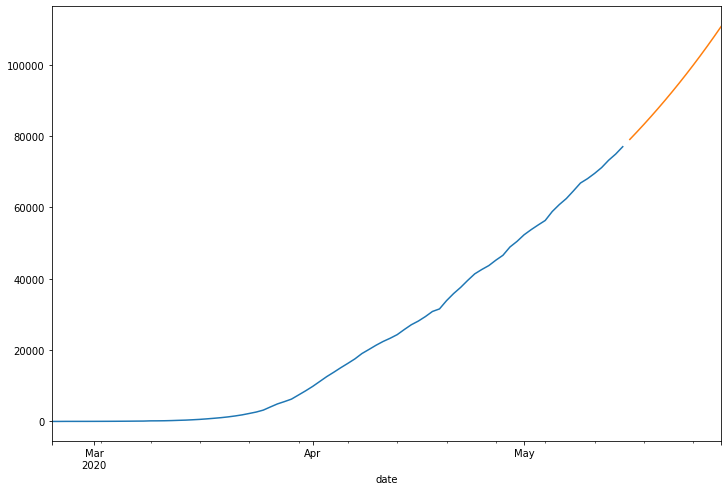

In [49]:
CA_final_model = ExponentialSmoothing(CA_df['cases'],trend='mul').fit()
CA_forecast_predictions = CA_final_model.forecast(14)#forecast two weeks ahead
CA_df['cases'].plot(figsize=(12,8))
CA_forecast_predictions.plot();

In [0]:
NY_training_count = round(len(NY_df) * .75)
NY_training_data = NY_df.iloc[:NY_training_count + 1]
NY_test_data = NY_df.iloc[NY_training_count:]

In [0]:
NY_multiplicative_model = ExponentialSmoothing(NY_training_data['cases'],trend='mul').fit()
NY_additive_model = ExponentialSmoothing(NY_training_data['cases'],trend='add').fit()

In [0]:
NY_test_predictions_mul = NY_multiplicative_model.forecast(len(NY_test_data)).rename('HW Forecast')
NY_test_predictions_add = NY_additive_model.forecast(len(NY_test_data)).rename('HW Forecast')

In [53]:
NY_test_predictions_mul

2020-04-29    303642.689888
2020-04-30    307047.127051
2020-05-01    310489.734712
2020-05-02    313970.940836
2020-05-03    317491.178190
2020-05-04    321050.884391
2020-05-05    324650.501962
2020-05-06    328290.478391
2020-05-07    331971.266180
2020-05-08    335693.322904
2020-05-09    339457.111271
2020-05-10    343263.099175
2020-05-11    347111.759757
2020-05-12    351003.571463
2020-05-13    354939.018101
2020-05-14    358918.588906
2020-05-15    362942.778598
2020-05-16    367012.087442
Freq: D, Name: HW Forecast, dtype: float64

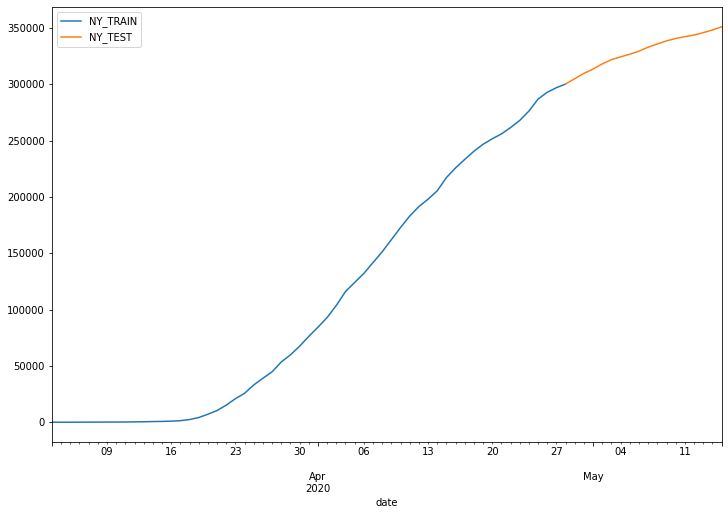

In [54]:
NY_training_data['cases'].plot(legend=True,label='NY_TRAIN')
NY_test_data['cases'].plot(legend=True,label='NY_TEST',figsize=(12,8));

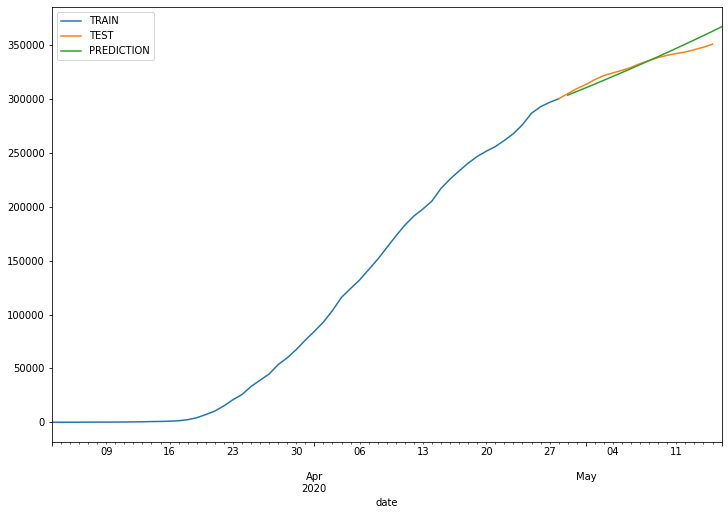

In [55]:
NY_training_data['cases'].plot(legend=True,label='TRAIN')
NY_test_data['cases'].plot(legend=True,label='TEST',figsize=(12,8));
NY_test_predictions_mul.plot(legend=True,label='PREDICTION');

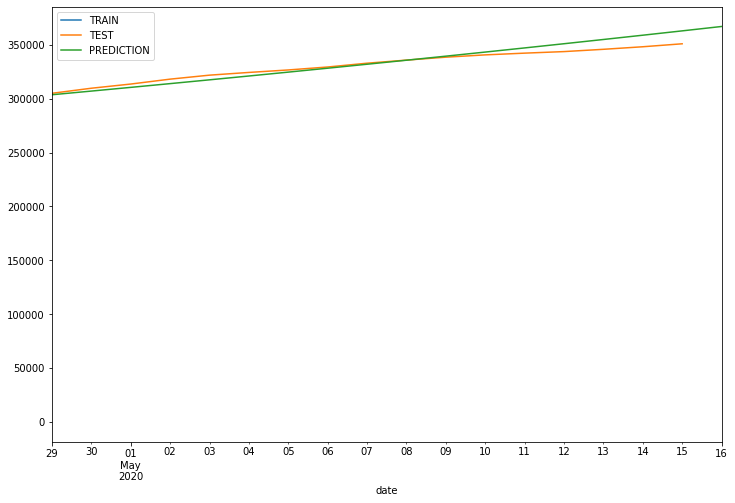

In [56]:
NY_training_data['cases'].plot(legend=True,label='TRAIN')
NY_test_data['cases'].plot(legend=True,label='TEST',figsize=(12,8))
#let's zoom into the period we were predicting for
NY_test_predictions_mul.plot(legend=True,label='PREDICTION',xlim=[NY_test_predictions_mul.iloc[:].index[0].strftime('%Y-%m-%d'),NY_test_predictions_mul.iloc[-1:].index[0].strftime('%Y-%m-%d')]);

In [57]:
#MAE of the multiplicative model
mean_absolute_error(NY_test_data['cases'],NY_test_predictions_mul)

5222.945225371203

In [58]:
#MSE of the multiplicative model
mean_squared_error(NY_test_data['cases'],NY_test_predictions_mul)

53404424.34780892

In [59]:
#RMSE of the multiplicative model
np.sqrt(mean_squared_error(NY_test_data['cases'],NY_test_predictions_mul))

7307.833081550845

In [60]:
NY_test_data.describe() #we want to compare MSE with Avergae of Test Data, or RMSE with STD of overall True Data

,cases,deaths
count,18.000000,18.000000
mean,329321.277778,25608.611111
std,15378.683210,1631.123328
min,300276.000000,22777.000000
25%,319058.750000,24170.250000
50%,331168.000000,26081.000000
75%,341864.500000,26951.750000
max,350951.000000,27755.000000


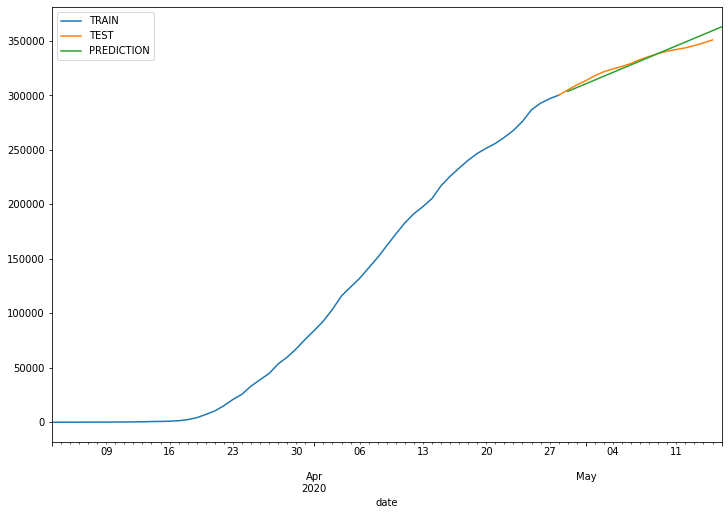

In [61]:
NY_training_data['cases'].plot(legend=True,label='TRAIN')
NY_test_data['cases'].plot(legend=True,label='TEST',figsize=(12,8));
NY_test_predictions_add.plot(legend=True,label='PREDICTION');

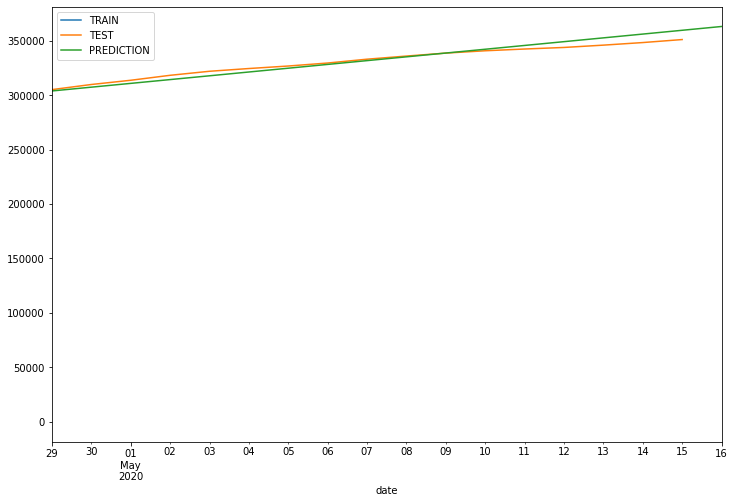

In [62]:
NY_training_data['cases'].plot(legend=True,label='TRAIN')
NY_test_data['cases'].plot(legend=True,label='TEST',figsize=(12,8))
#let's zoom into the period we were predicting for
NY_test_predictions_add.plot(legend=True,label='PREDICTION',xlim=[NY_test_predictions_add.iloc[:].index[0].strftime('%Y-%m-%d'),NY_test_predictions_add.iloc[-1:].index[0].strftime('%Y-%m-%d')]);

In [63]:
#MAE of the multiplicative model
mean_absolute_error(NY_test_data['cases'],NY_test_predictions_add)

4156.006326112599

In [64]:
#MSE of the multiplicative model
mean_squared_error(NY_test_data['cases'],NY_test_predictions_add)

31800244.216341276

In [65]:
#RMSE of the multiplicative model
np.sqrt(mean_squared_error(NY_test_data['cases'],NY_test_predictions_add))

5639.170525559701

In [66]:
NY_test_data.describe() #we want to compare MSE with Avergae of Test Data, or RMSE with STD of overall True Data

,cases,deaths
count,18.000000,18.000000
mean,329321.277778,25608.611111
std,15378.683210,1631.123328
min,300276.000000,22777.000000
25%,319058.750000,24170.250000
50%,331168.000000,26081.000000
75%,341864.500000,26951.750000
max,350951.000000,27755.000000


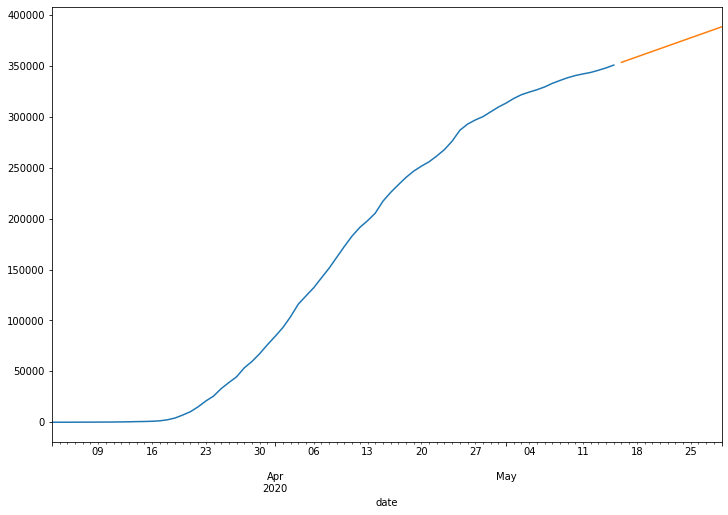

In [67]:
NY_final_model = ExponentialSmoothing(NY_df['cases'],trend='add').fit()
NY_forecast_predictions = NY_final_model.forecast(14)#forecast two weeks ahead
NY_df['cases'].plot(figsize=(12,8))
NY_forecast_predictions.plot();

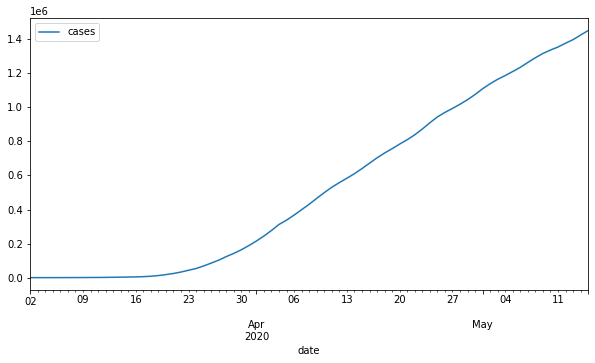

In [68]:
US_df = US_Cases_Deaths
US_df = US_df.drop(['deaths'], axis=1)
US_df = US_df[US_df["cases"] > 100]
US_df.plot(figsize=(10,5))

In [0]:
US_training_count = round(len(US_df) * .75)
US_training_data = US_df.iloc[:US_training_count + 1]
US_test_data = US_df.iloc[US_training_count:]

In [0]:
US_multiplicative_model = ExponentialSmoothing(US_training_data['cases'],trend='mul').fit()
US_additive_model = ExponentialSmoothing(US_training_data['cases'],trend='add').fit()

In [0]:
US_test_predictions_mul = US_multiplicative_model.forecast(len(NY_test_data)).rename('HW Forecast')
US_test_predictions_add = US_additive_model.forecast(len(NY_test_data)).rename('HW Forecast')

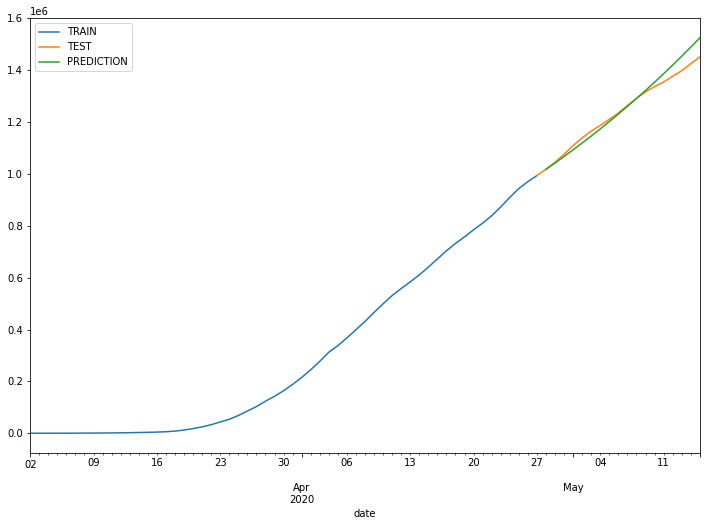

In [72]:
US_training_data['cases'].plot(legend=True,label='TRAIN')
US_test_data['cases'].plot(legend=True,label='TEST',figsize=(12,8));
US_test_predictions_mul.plot(legend=True,label='PREDICTION');

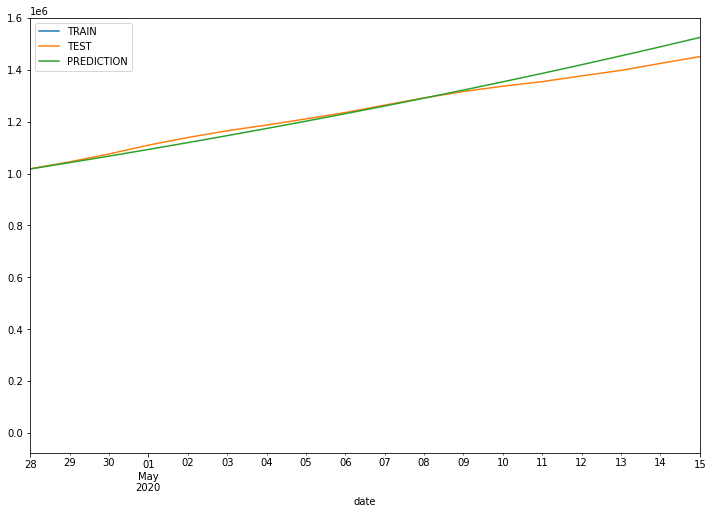

In [73]:
US_training_data['cases'].plot(legend=True,label='TRAIN')
US_test_data['cases'].plot(legend=True,label='TEST',figsize=(12,8))
#let's zoom into the period we were predicting for
US_test_predictions_mul.plot(legend=True,label='PREDICTION',xlim=[US_test_predictions_mul.iloc[:].index[0].strftime('%Y-%m-%d'), US_test_predictions_mul.iloc[-1:].index[0].strftime('%Y-%m-%d')]);

In [74]:
#MAE of the multiplicative model
print('MAE: %2.3f' % mean_absolute_error(US_test_data['cases'],US_test_predictions_mul))
print()
#MSE of the multiplicative model
print('MSE: %2.3f' % mean_squared_error(US_test_data['cases'],US_test_predictions_mul))
#RMSE of the multiplicative model
print('RMSE: %2.3f' % np.sqrt(mean_squared_error(US_test_data['cases'],US_test_predictions_mul)))

ValueError: ignored

In [0]:
US_test_data.describe()

In [0]:
US_df.describe()

In [0]:
US_training_data['cases'].plot(legend=True,label='TRAIN')
US_test_data['cases'].plot(legend=True,label='TEST',figsize=(12,8));
US_test_predictions_add.plot(legend=True,label='PREDICTION');

In [0]:
US_training_data['cases'].plot(legend=True,label='TRAIN')
US_test_data['cases'].plot(legend=True,label='TEST',figsize=(12,8))
#let's zoom into the period we were predicting for
US_test_predictions_add.plot(legend=True,label='PREDICTION',xlim=[US_test_predictions_add.iloc[:].index[0].strftime('%Y-%m-%d'), US_test_predictions_add.iloc[-1:].index[0].strftime('%Y-%m-%d')]);

In [0]:
#MAE of the multiplicative model
print('MAE: %2.3f' % mean_absolute_error(US_test_data['cases'],US_test_predictions_add))
#MSE of the multiplicative model
print('MSE: %2.3f' % mean_squared_error(US_test_data['cases'],US_test_predictions_add))
#RMSE of the multiplicative model
print('RMSE: %2.3f' % np.sqrt(mean_squared_error(US_test_data['cases'],US_test_predictions_add)))

In [0]:
US_df.describe()

In [0]:
US_final_model = ExponentialSmoothing(US_df['cases'],trend='add').fit()

In [0]:
US_forecast_predictions = US_final_model.forecast(14)#forecast two weeks ahead

In [0]:
US_df['cases'].plot(figsize=(12,8))
US_forecast_predictions.plot();